In [2]:
# Importing all the necessary packages

import random
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('C:/Users/BHASKAR BOSE/Dropbox/My PC (LAPTOP-7GV3U44E)/Downloads/XMM_ML.csv')
data.head()

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ep_8_fmin,sc_ep_8_fmax,Class
0,1.836559,20.122780,0.508007,408.3659,2.380000e-15,7.000000e-15,9.370000e-15,1.060000e-14,1.970000e-14,4.850000e-14,3.080000e-14,0.389105,-0.002790,-0.401496,-0.120218,0.0,2.650000e-14,9.910000e-14,0
1,87.383962,-21.924875,0.336117,2672.8470,7.140000e-15,1.990000e-14,2.800000e-14,3.040000e-14,5.990000e-14,1.460000e-13,8.370000e-14,0.444257,0.119971,-0.443130,-0.331475,0.0,1.430000e-13,1.490000e-13,0
2,159.945875,-5.116026,0.521204,583.1679,2.380000e-15,7.920000e-15,8.050000e-15,9.410000e-15,4.540000e-15,3.030000e-14,2.890000e-14,0.515240,0.000777,-0.370514,-0.495102,0.0,2.010000e-14,6.730000e-14,0
3,38.766442,32.677084,0.689360,292.4774,7.120000e-16,6.610000e-15,2.400000e-14,6.570000e-14,8.240000e-14,1.860000e-13,7.540000e-14,0.849070,0.559812,-0.026348,-0.400924,0.0,1.580000e-13,2.640000e-13,0
4,141.661199,36.400714,0.309602,2871.4660,2.670000e-15,9.070000e-15,1.980000e-14,4.530000e-14,5.810000e-14,1.360000e-13,6.460000e-14,0.497494,0.319506,-0.113438,-0.504149,0.0,1.360000e-13,1.360000e-13,0


In [4]:
print("Shape of the data is {}".format(data.shape))

Shape of the data is (23017, 19)


In [5]:
data.isnull().sum()

sc_ra             0
sc_dec            0
sc_poserr         0
sc_det_ml         0
sc_ep_1_flux      0
sc_ep_2_flux      0
sc_ep_3_flux      0
sc_ep_4_flux      0
sc_ep_5_flux      0
sc_ep_8_flux      0
sc_ep_9_flux      0
sc_hr1           34
sc_hr2           13
sc_hr3           44
sc_hr4          246
sc_extent         0
sc_ep_8_fmin      0
sc_ep_8_fmax      0
Class             0
dtype: int64

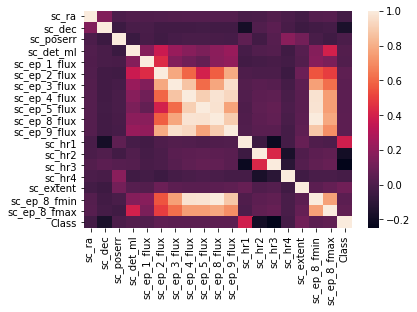

In [6]:
# Some basic EDA to investigate the data

data=data.dropna()
sns.heatmap(data.corr())

C:\Users\BHASKAR BOSE\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


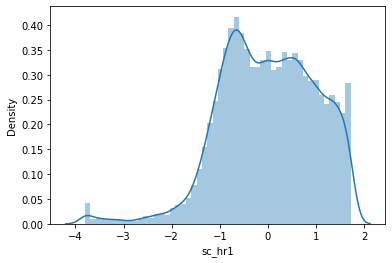

In [10]:
# According to the above plot it seems that sc_hr1 is the most correlated to the Class variable

sns.distplot(main_data['sc_hr1'])

In [7]:
# Standardisation for better training results

scaler=preprocessing.StandardScaler()

data.index=np.array(range(22715))
main_data=data[data.columns[0:-1]]
labels=data[data.columns[-1]]
columns=main_data.columns

main_data=scaler.fit_transform(main_data)
main_data

main_data=pd.DataFrame(main_data,columns=columns)
main_data.head()

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ep_8_fmin,sc_ep_8_fmax
0,-1.623851,0.451717,-0.586389,-0.065919,-0.035704,-0.081287,-0.053214,-0.042491,-0.039007,-0.048602,-0.058635,0.033827,0.061084,0.127151,0.302817,-0.16029,-0.045165,-0.061084
1,-0.730777,-0.685126,-0.837420,-0.065047,-0.034653,-0.077546,-0.050662,-0.041457,-0.038055,-0.047158,-0.056369,0.186057,0.370809,0.008002,-0.104440,-0.16029,-0.043378,-0.060547
2,0.026734,-0.230665,-0.567116,-0.065852,-0.035704,-0.081021,-0.053394,-0.042553,-0.039366,-0.048872,-0.058716,0.381981,0.070083,0.215816,-0.419877,-0.16029,-0.045263,-0.061426
3,-1.238321,0.791147,-0.321538,-0.065964,-0.036073,-0.081400,-0.051210,-0.039614,-0.037523,-0.046565,-0.056725,1.303412,1.480530,1.200751,-0.238322,-0.16029,-0.043148,-0.059310
4,-0.164149,0.891823,-0.876142,-0.064970,-0.035640,-0.080687,-0.051785,-0.040679,-0.038098,-0.047306,-0.057187,0.332999,0.874238,0.951518,-0.437319,-0.16029,-0.043485,-0.060687


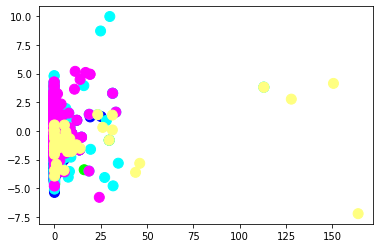

In [7]:
# Lets try to plot the data here according to column
# First we reduce the data into its 2 principal components, after which we plot the data according to its column

pca=PCA(n_components=2)
csv_data=pca.fit_transform(main_data)

c1=(1.0,0.0,0.0,1.0)
c2=(0.0,1.0,0.0,1.0)
c3=(0.0,0.0,1.0,1.0)
c4=(1.0,1.0,0.0,1.0)
c5=(0.0,1.0,1.0,1.0)
c6=(1.0,0.0,1.0,1.0)
c7=(1.0,1.0,0.5,1.0)
colormap=np.array([c1,c2,c3,c4,c5,c6,c7])

label_data=np.array(labels)

plt.scatter(csv_data[:,0], csv_data[:,1],s=100, c=colormap[label_data])
plt.show()

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(main_data, labels, stratify=labels, test_size=0.2)

In [9]:
# This is baseline with no oversampling/undersampling
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
xgb_clf = xgb.XGBClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)
xgb_clf.fit(X_train, Y_train)

# performing predictions on the test dataset
y_pred_rf1 = clf.predict(X_test)
y_pred_xgb1 = xgb_clf.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE Random_Forest_Classifier: ", metrics.accuracy_score(Y_test, y_pred_rf1))
print("ACCURACY OF THE XGB_Classifier: ", metrics.accuracy_score(Y_test, y_pred_xgb1))

ACCURACY OF THE Random_Forest_Classifier:  0.7569887739379265
ACCURACY OF THE XGB_Classifier:  0.7946290997138454


In [11]:
print(classification_report(Y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.14      0.22        35
           2       0.80      0.90      0.84      2062
           3       0.00      0.00      0.00        52
           4       0.80      0.87      0.84      1606
           5       0.41      0.23      0.30       771
           6       0.25      0.10      0.14        10

    accuracy                           0.76      4543
   macro avg       0.39      0.32      0.33      4543
weighted avg       0.72      0.76      0.73      4543



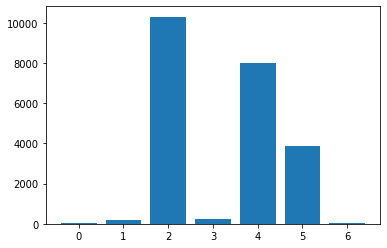

In [12]:
# Inspecting Class imbalance, here class 2 has the largest number of instances

labels_df=pd.DataFrame(labels)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [14]:
# Introducing SMOTEENN (SMOTE + Edited Nearset Neighbour) to tackle the problem of class imbalance.
# For the deficient classes we first use SMOTE to oversample them to have 2000 instances each, following which we use undersampling

smt=SMOTEENN(sampling_strategy={0:2000, 1:2000, 3:2000, 6:2000})

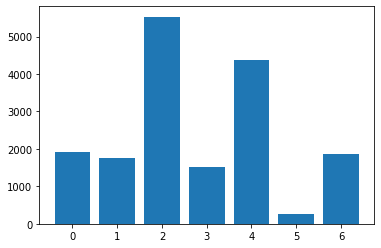

In [15]:
# Visualizing the data after class imbalance problem is tackled.

X,Y=smt.fit_resample(main_data, labels)

labels_df=pd.DataFrame(Y)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, stratify=Y, test_size=0.2)

In [18]:
# Using RF Classifier and XGB Classifier to classify the modified data. Notice the results.
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
xgb_clf = xgb.XGBClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)
xgb_clf.fit(X_train, Y_train)

# performing predictions on the test dataset
y_pred_rf2 = clf.predict(X_test)
y_pred_xgb2 = xgb_clf.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE Random_Forest_Classifier: ", metrics.accuracy_score(Y_test, y_pred_rf2))
print("ACCURACY OF THE XGB_Classifier: ", metrics.accuracy_score(Y_test, y_pred_xgb2))

ACCURACY OF THE Random_Forest_Classifier:  0.9623188405797102
ACCURACY OF THE XGB_Classifier:  0.9788405797101449


In [19]:
print(classification_report(Y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       384
           1       0.95      0.94      0.95       352
           2       0.96      0.98      0.97      1106
           3       0.96      0.88      0.92       302
           4       0.94      0.97      0.96       877
           5       1.00      0.62      0.76        55
           6       0.99      0.99      0.99       374

    accuracy                           0.96      3450
   macro avg       0.97      0.91      0.93      3450
weighted avg       0.96      0.96      0.96      3450



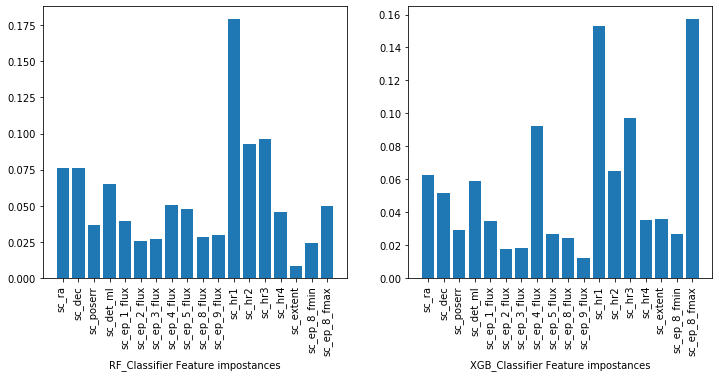

In [20]:
# Which features are the most important.
# It seems the initial heatmap plotted gave a good indication of which features are most important.
# Feature sc_hr1 is the most important.

figs, axes = plt.subplots(1,2)
axes[0].bar(X.columns,clf.feature_importances_)
axes[1].bar(X.columns,xgb_clf.feature_importances_)

figs.set_figwidth(12)
figs.set_figheight(5)

plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)

axes[0].set_xlabel('RF_Classifier Feature impostances')
axes[1].set_xlabel('XGB_Classifier Feature impostances')
plt.show()

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(main_data, labels, stratify=labels, test_size=0.2)

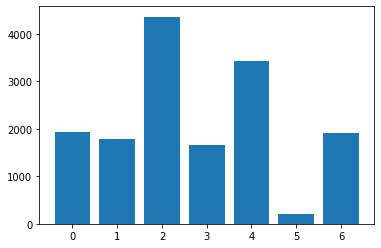

In [22]:
# Lets perform the same experiment as above, but this time slightly different.
# Here we first split the data, then we apply SMOTEENN on X_train, this exp will be more relevant.

X,Y=smt.fit_resample(X_train, Y_train)

labels_df=pd.DataFrame(Y)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [23]:
# Similar procedure of using RF_Classifier and XGB_Classifier but this time on SMOTEENN applied on X_train
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
xgb_clf = xgb.XGBClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X, Y)
xgb_clf.fit(X, Y)

# performing predictions on the test dataset
y_pred_rf3 = clf.predict(X_test)
y_pred_xgb3 = xgb_clf.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE Random_Forest_Classifier: ", metrics.accuracy_score(Y_test, y_pred_rf3))
print("ACCURACY OF THE XGB_Classifier: ", metrics.accuracy_score(Y_test, y_pred_xgb3))

ACCURACY OF THE Random_Forest_Classifier:  0.7393792648029937
ACCURACY OF THE XGB_Classifier:  0.75016508914814


In [24]:
# It seems that this procedure gives even worse results than the baseline, Explanation given in README.

print(classification_report(Y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.15      0.43      0.23        35
           2       0.79      0.90      0.84      2062
           3       0.12      0.35      0.18        52
           4       0.79      0.89      0.84      1606
           5       0.82      0.06      0.12       771
           6       0.12      0.70      0.20        10

    accuracy                           0.74      4543
   macro avg       0.40      0.47      0.34      4543
weighted avg       0.78      0.74      0.70      4543



In [25]:
# This is how the confusion matrix looks like, the diagnol elements are the True Positives.

confusion_matrix(Y_test, y_pred_rf1)

array([[   0,    0,    6,    1,    0,    0,    0],
       [   0,   15,    7,    2,    7,    0,    4],
       [  26,   19, 1847,   57,   97,    8,    8],
       [   1,    6,   21,   18,    5,    1,    0],
       [   6,   38,   96,   14, 1423,    2,   27],
       [  12,   18,  367,   56,  256,   49,   13],
       [   0,    1,    0,    0,    2,    0,    7]], dtype=int64)

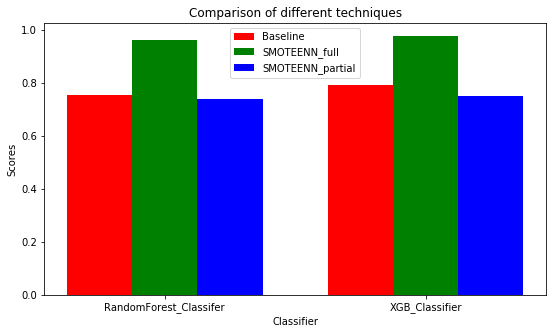

In [34]:
# Plotting the results as a bar graph, notice that the baseline results are better than the results for SMOTEENN applied only on X_train

N = 2
ind = np.arange(N) 
width = 0.25

fig = plt.subplots(figsize=(9,5))
xvals = [metrics.accuracy_score(Y_test, y_pred_rf1), metrics.accuracy_score(Y_test, y_pred_xgb1)]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [metrics.accuracy_score(Y_test, y_pred_rf2), metrics.accuracy_score(Y_test, y_pred_xgb2)]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [metrics.accuracy_score(Y_test, y_pred_rf3), metrics.accuracy_score(Y_test, y_pred_xgb3)]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("Classifier")
plt.ylabel('Scores')
plt.title("Comparison of different techniques")
  
plt.xticks(ind+width,['RandomForest_Classifer','XGB_Classifier'])
plt.legend( (bar1, bar2, bar3), ('Baseline', 'SMOTEENN_full', 'SMOTEENN_partial') )
plt.show()